# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Data Acquistion

In [2]:
df = pd.read_csv('netflix.csv')
df = df.drop(columns=['description'], axis =1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


# Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [4]:
df.shape # Total records in the data is 8807

(8807, 11)

In [5]:
# info about non null-count & datatype of each column 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [6]:
df['type'].unique() # There are two types of content- movies&tv shows

array(['Movie', 'TV Show'], dtype=object)

In [7]:
df['type'].value_counts(normalize=True) #~70% of the content are movies

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

## Data Preprocessing

### Unnesting Of the Data

#### Title & Cast

In [8]:
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
constraint

df_new=pd.DataFrame(constraint,index=df['title'])
df_new

df_new=df_new.stack()
df_new

df_new=pd.DataFrame(df_new)
df_new

df_new = df_new.reset_index()
df_cast=df_new[['title',0]] 
df_cast.columns=['title','cast']

df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


#### Title & Country

In [9]:
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
constraint

df_new=pd.DataFrame(constraint,index=df['title'])
df_new

df_new=df_new.stack()
df_new

df_new=pd.DataFrame(df_new)
df_new

df_new = df_new.reset_index()
df_country=df_new[['title',0]] 
df_country.columns=['title','country']

df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


#### Title & Director

In [10]:
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
constraint

df_new=pd.DataFrame(constraint,index=df['title'])
df_new

df_new=df_new.stack()
df_new

df_new=pd.DataFrame(df_new)
df_new

df_new = df_new.reset_index()
df_director=df_new[['title',0]] 
df_director.columns=['title','director']

df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


#### Title & Genre

In [11]:
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
constraint

df_new=pd.DataFrame(constraint,index=df['title'])
df_new

df_new=df_new.stack()
df_new

df_new=pd.DataFrame(df_new)
df_new

df_new = df_new.reset_index()
df_genre=df_new[['title',0]] 
df_genre.columns=['title','listed_in']

df_genre

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [13]:
df_temp = df_director.merge(df_cast, on = ['title'], how= 'inner')
df_temp_1 = df_temp.merge(df_country, on = ['title'], how= 'inner')
df_temp_2 = df_temp_1.merge(df_genre, on = ['title'], how= 'inner')
df_temp_2

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [14]:
df_left = df[['show_id','type','title','date_added','release_year','rating','duration']]
df_left

,show_id,type,title,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min


### Duration Column Treatment

In [15]:
df[df['duration'].isna()==True] #you can see rating has duration for these three records

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [16]:
df['duration'] = np.where(df['duration'].isna()==True,df['rating'],df['duration'])

In [17]:
constraint=df['duration'].apply(lambda x: str(x).split(' ')).tolist()
df_new=pd.DataFrame(constraint,index=df['title']).reset_index()
df_new = df_new[['title',0]]
df_new.columns = ['title','duration_new']
df_new

,title,duration_new
0,Dick Johnson Is Dead,90
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
...,...,...
8802,Zodiac,158
8803,Zombie Dumb,2
8804,Zombieland,88
8805,Zoom,88


In [18]:
df_left_1 = df_left.merge(df_new, on=['title'], how= 'inner')
df_left_1

,show_id,type,title,date_added,release_year,rating,duration,duration_new
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,90
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,2
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,1
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,1
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,2
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,158
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,2
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,88
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,88


In [19]:
df_final = df_temp_2.merge(df_left_1, on = ['title'], how = 'inner')
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,90
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,111
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,111
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,111
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,111


### Date Added Data Type Change

In [20]:
df_final['date_added'] = pd.to_datetime(df_final['date_added'])
df_final['Year'] = df_final['date_added'].dt.year
df_final['Month'] = df_final['date_added'].dt.month
df_final['Week'] = df_final['date_added'].dt.week
df_final

<ipython-input-20-12fedb75697c>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_final['Week'] = df_final['date_added'].dt.week


,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new,Year,Month,Week
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,90,2021.0,9.0,38.0
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0


### Missing Value Treatment

In [21]:
df_final = df_final.replace('nan',np.NaN)
df_final= df_final.replace('',np.NaN)
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new,Year,Month,Week
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,90,2021.0,9.0,38.0
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0


#### Country Column Missing value Treatment Based on Mode

In [22]:
df1 = df_final.groupby(['country'])['title'].nunique().reset_index()

df1.sort_values(by='title', ascending =False )

,country,title
118,United States,3689
46,India,1046
116,United Kingdom,804
21,Canada,445
37,France,393
...,...,...
56,Kazakhstan,1
53,Jamaica,1
98,Slovakia,1
35,Ethiopia,1


In [98]:
df_final['country'] = df_final['country'].replace('NaN','United States')

In [24]:
df_final['country'] = df_final['country'].fillna('United States')
df_final.isnull().sum()

title               0
director        50643
cast             2146
country             0
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
duration_new        0
Year              158
Month             158
Week              158
dtype: int64

#### Cast Column Missing value Treatment Based on Mode

In [25]:
df1 = df_final.groupby(['country','listed_in','cast'])['title'].nunique().reset_index()
df1 = df1.sort_values(by=['country','listed_in','title'], ascending =[True,True,False])
df2 = df1.drop_duplicates(subset = ['country','listed_in'], keep='first')
df2

,country,listed_in,cast,title
0,Afghanistan,Documentaries,Sohrab Nazari,1
1,Afghanistan,International Movies,Sohrab Nazari,1
2,Albania,Dramas,Claudio Santamaria,1
6,Albania,International Movies,Claudio Santamaria,1
10,Algeria,Classic Movies,Abdalla Mahmoud,1
...,...,...,...,...
151388,West Germany,TV Dramas,Christopher Lee,1
151403,West Germany,Thrillers,Ewa Dałkowska,1
151413,Zimbabwe,Comedies,Charmaine Mujeri,1
151425,Zimbabwe,International Movies,Charmaine Mujeri,1


In [26]:
df2 = df2.sort_values(by=['title'], ascending=False).reset_index(drop=True)[['country','listed_in','cast']]
df2.columns = ['country','listed_in','cast_new']
df2

,country,listed_in,cast_new
0,India,International Movies,Anupam Kher
1,India,Dramas,Shah Rukh Khan
2,Japan,Anime Series,Takahiro Sakurai
3,United States,Children & Family Movies,Julie Tejwani
4,India,Comedies,Anupam Kher
...,...,...,...
1347,Israel,Crime TV Shows,Assi Levy
1348,Israel,Documentaries,Bobbi Jene Smith
1349,Israel,Docuseries,Linor Abargil
1350,Israel,Faith & Spirituality,Avraham Aviv Alush


In [27]:
df_final = df_final.merge(df2, on = ['country','listed_in'], how='left')
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new,Year,Month,Week,cast_new
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,90,2021.0,9.0,38.0,Craig Sechler
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Ama Qamata
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Akshay Kumar
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Shah Rukh Khan
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher


In [28]:
df_final['cast'] = df_final['cast'].fillna('NaN')

In [29]:
import math
def cast_map(xx):
    
    if(xx['cast']== 'NaN'):
        xx['cast'] = xx['cast_new']
        
    return xx
        

In [30]:
df_final = df_final.apply(lambda x: cast_map(x), axis=1)
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new,Year,Month,Week,cast_new
0,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,90,2021.0,9.0,38.0,Craig Sechler
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Ama Qamata
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Akshay Kumar
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Shah Rukh Khan
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher


In [31]:
df_final['cast'].value_counts()

David Attenborough    411
Craig Sechler         353
Liam Neeson           161
Alfred Molina         160
Anupam Kher           148
                     ... 
Bonnie Hay              1
Louis Ferrigno          1
Mitt Romney             1
Christian James         1
Karis Paige Bryant      1
Name: cast, Length: 36439, dtype: int64

In [32]:
df_final['cast'] = df_final['cast'].fillna('David Attenborough')
df_final['cast']

0                 Craig Sechler
1                    Ama Qamata
2                    Ama Qamata
3                    Ama Qamata
4                   Khosi Ngema
                  ...          
201986           Anita Shabdish
201987           Anita Shabdish
201988    Chittaranjan Tripathy
201989    Chittaranjan Tripathy
201990    Chittaranjan Tripathy
Name: cast, Length: 201991, dtype: object

In [33]:
df_final['cast'].isna().sum()

0

#### Director Column Missing value Treatment Based on Mode

In [34]:
df1 = df_final.groupby(['country','listed_in','director'])['title'].nunique().reset_index()
df1 = df1.sort_values(by=['country','listed_in','title'], ascending =[True,True,False])
df2 = df1.drop_duplicates(subset = ['country','listed_in'], keep='first')
df2

,country,listed_in,director,title
0,Afghanistan,Documentaries,Pieter-Jan De Pue,1
1,Afghanistan,International Movies,Pieter-Jan De Pue,1
2,Albania,Dramas,Antonio Morabito,1
3,Albania,International Movies,Antonio Morabito,1
4,Algeria,Classic Movies,Youssef Chahine,1
...,...,...,...,...
16429,West Germany,Thrillers,Jacek Koprowicz,1
16430,Zimbabwe,Comedies,Tomas Brickhill,1
16431,Zimbabwe,Documentaries,Camilla Nielsson,1
16434,Zimbabwe,International Movies,Camilla Nielsson,1


In [35]:
df2 = df2.sort_values(by=['title'], ascending=False).reset_index(drop=True)[['country','listed_in','director']]
df2.columns = ['country','listed_in','director_new']
df2

,country,listed_in,director_new
0,United States,Children & Family Movies,Rajiv Chilaka
1,United States,Stand-Up Comedy,Marcus Raboy
2,Philippines,International Movies,Cathy Garcia-Molina
3,Mexico,Stand-Up Comedy,Jan Suter
4,Egypt,Dramas,Youssef Chahine
...,...,...,...
1099,Ireland,Independent Movies,Farhad Safinia
1100,Ireland,International Movies,Brett Harvey
1101,Ireland,International TV Shows,Noam Murro
1102,Ireland,Romantic Movies,Anand Tucker


In [36]:
df_final = df_final.merge(df2, on = ['country','listed_in'], how='left')
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new,Year,Month,Week,cast_new,director_new
0,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,90,2021.0,9.0,38.0,Craig Sechler,Vlad Yudin
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Ama Qamata,NaN
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher,Anurag Kashyap
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Akshay Kumar,Abbas Alibhai Burmawalla
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Shah Rukh Khan,Anurag Kashyap
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher,Anurag Kashyap


In [37]:
df_final['director'] = df_final['director'].fillna('NaN')

In [38]:

def director_map(xx):
    
    if(xx['director']== 'NaN'):
        xx['director'] = xx['director_new']
        
    return xx

In [39]:
df_final = df_final.apply(lambda x: director_map(x), axis=1)

In [40]:
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new,Year,Month,Week,cast_new,director_new
0,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,90,2021.0,9.0,38.0,Craig Sechler,Vlad Yudin
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Ama Qamata,NaN
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher,Anurag Kashyap
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Akshay Kumar,Abbas Alibhai Burmawalla
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Shah Rukh Khan,Anurag Kashyap
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher,Anurag Kashyap


In [41]:
df_final['director'].value_counts()

Abhishek Chaubey       5590
Alastair Fothergill    3055
Stan Lathan            2744
Alejandro Lozano       2532
Bhavik Thakore         2198
                       ... 
Jon Rudberg               1
Graham Townsley           1
Leslye Davis              1
Sue Kim                   1
Noah Moskin               1
Name: director, Length: 4993, dtype: int64

In [42]:
df_final['director'] = df_final['director'].fillna('Abhishek Chaubey')
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new,Year,Month,Week,cast_new,director_new
0,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,90,2021.0,9.0,38.0,Craig Sechler,Vlad Yudin
1,Blood & Water,Abhishek Chaubey,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
2,Blood & Water,Abhishek Chaubey,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
3,Blood & Water,Abhishek Chaubey,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Ama Qamata,NaN
4,Blood & Water,Abhishek Chaubey,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher,Anurag Kashyap
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Akshay Kumar,Abbas Alibhai Burmawalla
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Shah Rukh Khan,Anurag Kashyap
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher,Anurag Kashyap


In [43]:
df_final.isna().sum()

title              0
director           0
cast               0
country            0
listed_in          0
show_id            0
type               0
date_added       158
release_year       0
rating            67
duration           3
duration_new       0
Year             158
Month            158
Week             158
cast_new          78
director_new    7555
dtype: int64

In [44]:
df_final

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,duration_new,Year,Month,Week,cast_new,director_new
0,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,90,2021.0,9.0,38.0,Craig Sechler,Vlad Yudin
1,Blood & Water,Abhishek Chaubey,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
2,Blood & Water,Abhishek Chaubey,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
3,Blood & Water,Abhishek Chaubey,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Ama Qamata,NaN
4,Blood & Water,Abhishek Chaubey,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2,2021.0,9.0,38.0,Cindy Mahlangu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher,Anurag Kashyap
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Akshay Kumar,Abbas Alibhai Burmawalla
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Shah Rukh Khan,Anurag Kashyap
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,111,2019.0,3.0,9.0,Anupam Kher,Anurag Kashyap


### Non Graphical Analysis

### Top 5 Directors

In [45]:
df_final['director'].nunique() # There are total 4993 directors

4993

In [46]:
#Based on Number of Content
df1 = df_final.groupby(['director'])['title'].nunique().reset_index()
df1.columns = ['director','No_of_contents']
df1 = df1.sort_values(by = 'No_of_contents', ascending=False)
df1 # Abhishek Chaubey has the highest number of contents

,director,No_of_contents
34,Abhishek Chaubey,1011
4360,Stan Lathan,334
145,Alastair Fothergill,317
584,Bhavik Thakore,289
84,Adrián García Bogliano,254
...,...,...
2346,Juraj Šajmovič,1
2347,Just Philippot,1
2348,Justin Baldoni,1
2349,Justin Bare,1


#### Top 5 actors

In [47]:
df_final['cast'].nunique() # There are total 36439 actors

36439

In [48]:
df1 = df_final.groupby(['cast'])['title'].nunique().reset_index()
df1.columns = ['cast','No_of_contents']
df1 = df1.sort_values(by = 'No_of_contents', ascending=False)
df1 # Craig Sechler has the highest number of contents followed by David Attenborough 

,cast,No_of_contents
7085,Craig Sechler,290
7832,David Attenborough,260
13041,Hunter March,74
24224,Nassar,70
29610,Samuel West,69
...,...,...
6225,Chloe Wepper,1
18768,Kurt Carley,1
18767,Kura Forrester,1
18766,Kuo Tze-cheng,1


#### Top 5 Country

In [49]:
df_final['country'].unique() # List of the countries 

array(['United States', 'South Africa', 'India', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic',
       'Mexico', 'Turkey', 'Australia', 'France', 'Finland', 'China',
       'Canada', 'Japan', 'Nigeria', 'Spain', 'Belgium', 'South Korea',
       'Singapore', 'Italy', 'Romania', 'Argentina', 'Venezuela',
       'Hong Kong', 'Russia', 'Ireland', 'Nepal', 'New Zealand', 'Brazil',
       'Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Taiwan',
       'Bulgaria', 'Algeria', 'Poland', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Egypt', 'Denmark', 'Kuwait', 'Netherlands',
       'Malaysia', 'Vietnam', 'Hungary', 'Sweden', 'Lebanon', 'Syria',
       'Philippines', 'Iceland', 'United Arab Emirates', 'Norway',
       'Qatar', 'Mauritius', 'Austria', 'Cameroon', 'Palestine',
       'Uruguay', 'United Kingdom,', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malta'

In [50]:
df_final['country'].nunique() # There are total 126 countries

126

In [51]:
df1 = df_final.groupby(['country'])['title'].nunique().reset_index() # US is leading in tern of content followed by India
df1.columns = ['country','No_of_contents']
df1 = df1.sort_values(by = 'No_of_contents', ascending=False)
df1 # United States has the highest number of contents followed by India

,country,No_of_contents
118,United States,4522
46,India,1046
116,United Kingdom,804
21,Canada,445
37,France,393
...,...,...
56,Kazakhstan,1
53,Jamaica,1
98,Slovakia,1
35,Ethiopia,1


#### Top 5 genres

In [52]:
df_final['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [53]:
df_final['listed_in'].nunique() #Total 42 types of genres 

42

In [54]:
df1 = df_final.groupby(['listed_in'])['title'].nunique().reset_index()
df1.columns = ['listed_in','No_of_contents']
df1 = df1.sort_values(by = 'No_of_contents', ascending=False)
df1 # International movies, dramas & comedies are the top 3 genres

,listed_in,No_of_contents
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


#### Movie Vs TV Shows

In [55]:
df1 = df_final.groupby(['type'])['title'].nunique().reset_index() #70% of the content is movies
df1.columns = ['type','No_of_contents']
df1 = df1.sort_values(by = 'No_of_contents', ascending=False)
df1

,type,No_of_contents
0,Movie,6131
1,TV Show,2676


#### Yearly trend of the contents

In [56]:
df1 = df_final.groupby(['Year'])['title'].nunique().reset_index() 
df1.columns = ['Year','No_of_contents']
df1 = df1.sort_values(by = 'No_of_contents', ascending=False)
df1 #There is little drop in content in 2020 & 2021 (probably because \
#of covid impact )


,Year,No_of_contents
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188
8,2016.0,429
7,2015.0,82
6,2014.0,24
3,2011.0,13
5,2013.0,11


In [57]:
df1 = df_final.groupby(['Month'])['title'].nunique().reset_index() 
df1.columns = ['Month','No_of_contents']
df1 = df1.sort_values(by = 'Month', ascending=True)
df1 #There seems to surge in content volume in december & july,
#probably because of festivals

,Month,No_of_contents
0,1.0,738
1,2.0,563
2,3.0,742
3,4.0,764
4,5.0,632
5,6.0,728
6,7.0,827
7,8.0,755
8,9.0,770
9,10.0,760


#### Rating

In [58]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [59]:
df1 = df_final.groupby(['rating'])['title'].nunique().reset_index() 
df1.columns = ['rating','No_of_contents']
df1 = df1.sort_values(by = 'No_of_contents', ascending=False)
df1 # TV-MA & TV-14 are the two most consumed rating types

,rating,No_of_contents
11,TV-MA,3207
9,TV-14,2160
12,TV-PG,863
8,R,799
7,PG-13,490
14,TV-Y7,334
13,TV-Y,307
6,PG,287
10,TV-G,220
5,NR,80


#### Duration of Movies/Tv Shows

In [60]:
df_final[df_final['type']=='Movie']['duration_new'].astype(int).max(), df_final[df_final['type']=='Movie']['duration_new'].astype(int).min()
#Max duration of movies is 312 min while min duration of movies is 3 mins

(312, 3)

In [61]:
df_final[df_final['type']=='TV Show']['duration_new'].astype(int).max(), df_final[df_final['type']=='TV Show']['duration_new'].astype(int).min()
#Max number of seasons is 17, while minimum number of seasons is 1 in TV shows category

(17, 1)

## Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [62]:
import matplotlib.pyplot as plt

### histogram of continuous variables

### Content duration distribution

##### Movies

In [63]:
df_final['duration_new'] = df_final['duration_new'].astype(int)

In [64]:
x = df_final[df_final['type']=='Movie']['duration_new']

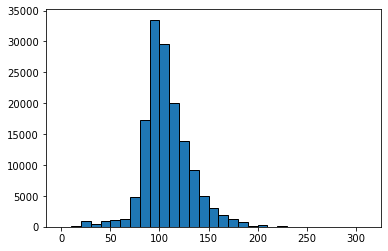

In [65]:
hist, edges = np.histogram(x, bins=np.arange(0,320,10))
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))

plt.show() # Clearly, Majority of the movies have duration in the range of 80 to 120 mins

#### TV Show

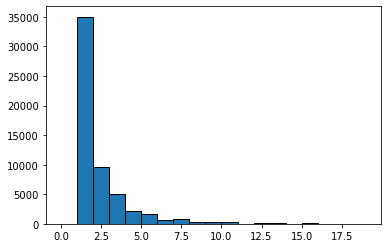

In [66]:
x = df_final[df_final['type']=='TV Show']['duration_new']

hist, edges = np.histogram(x, bins=np.arange(0,20,1))
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))

plt.show() # Clearly, Majority of the TV shows have around 1 to 3 seasons

In [67]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [68]:
sns.set(rc={'figure.figsize':(85,25)})

<AxesSubplot:xlabel='listed_in', ylabel='count'>

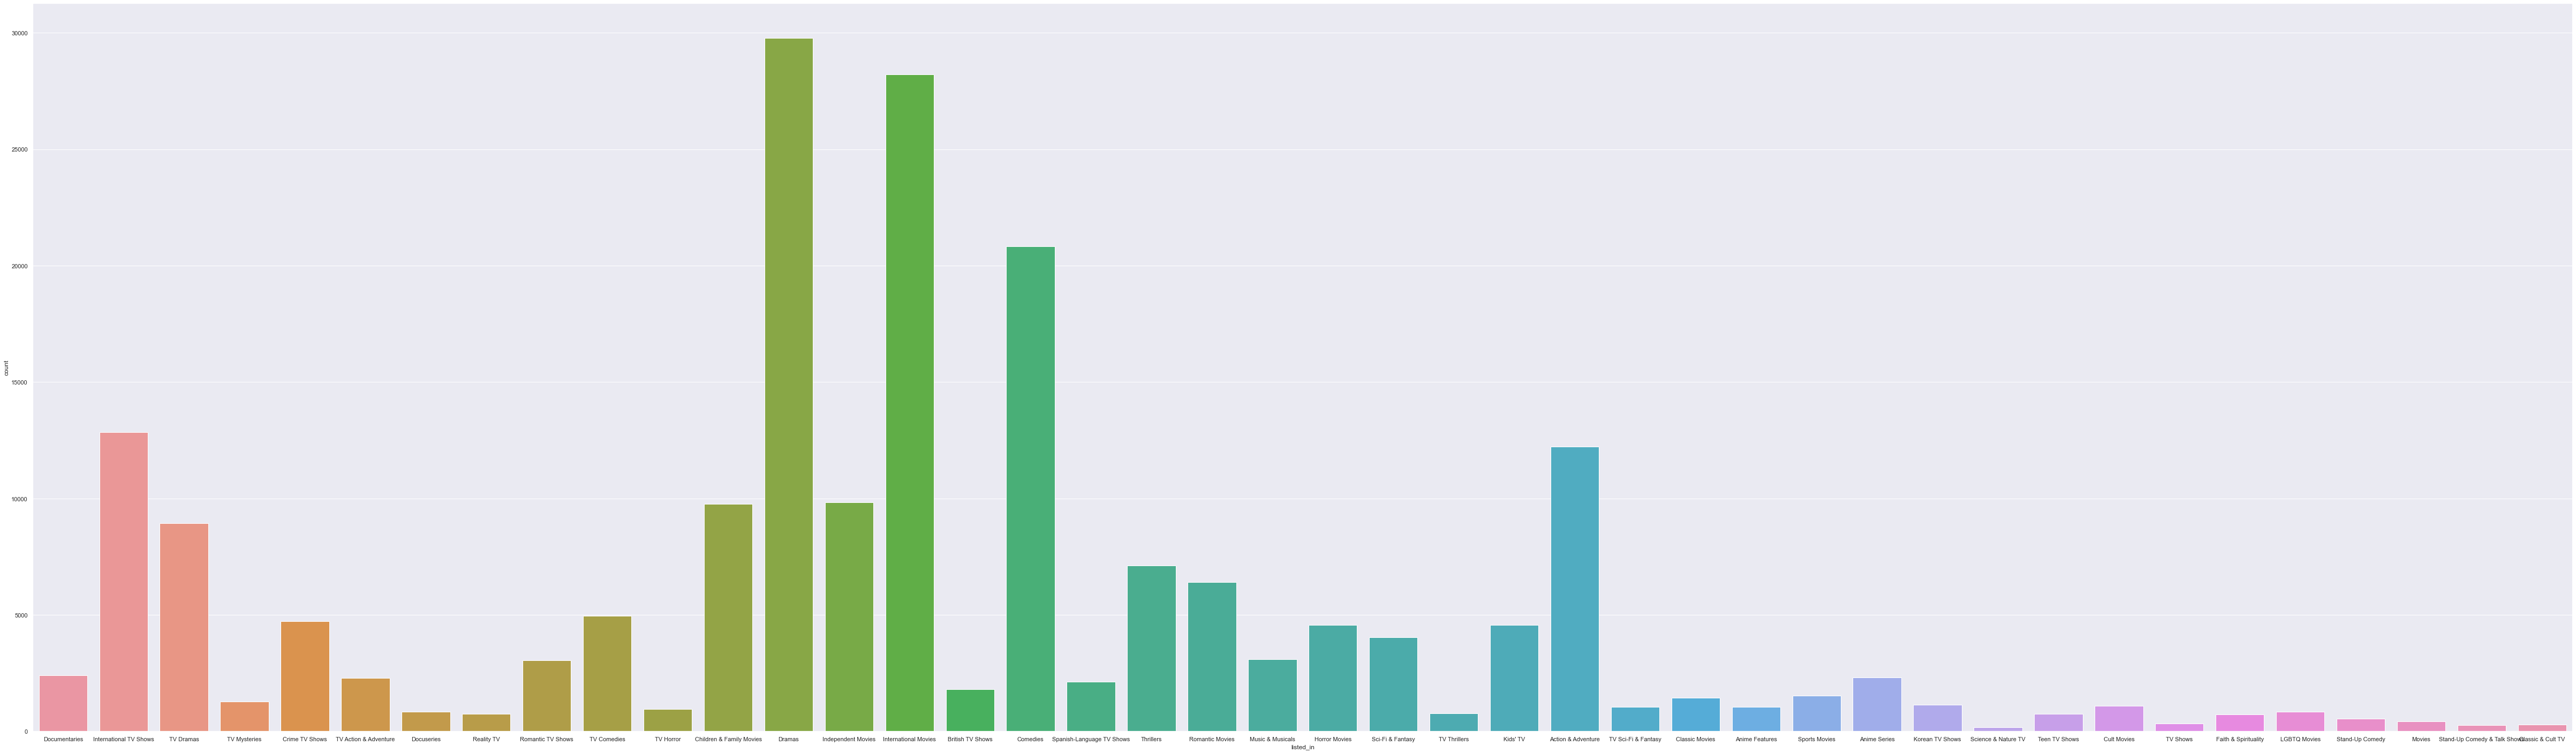

In [69]:
sns.countplot(x=df_final['listed_in'])

<AxesSubplot:xlabel='rating', ylabel='count'>

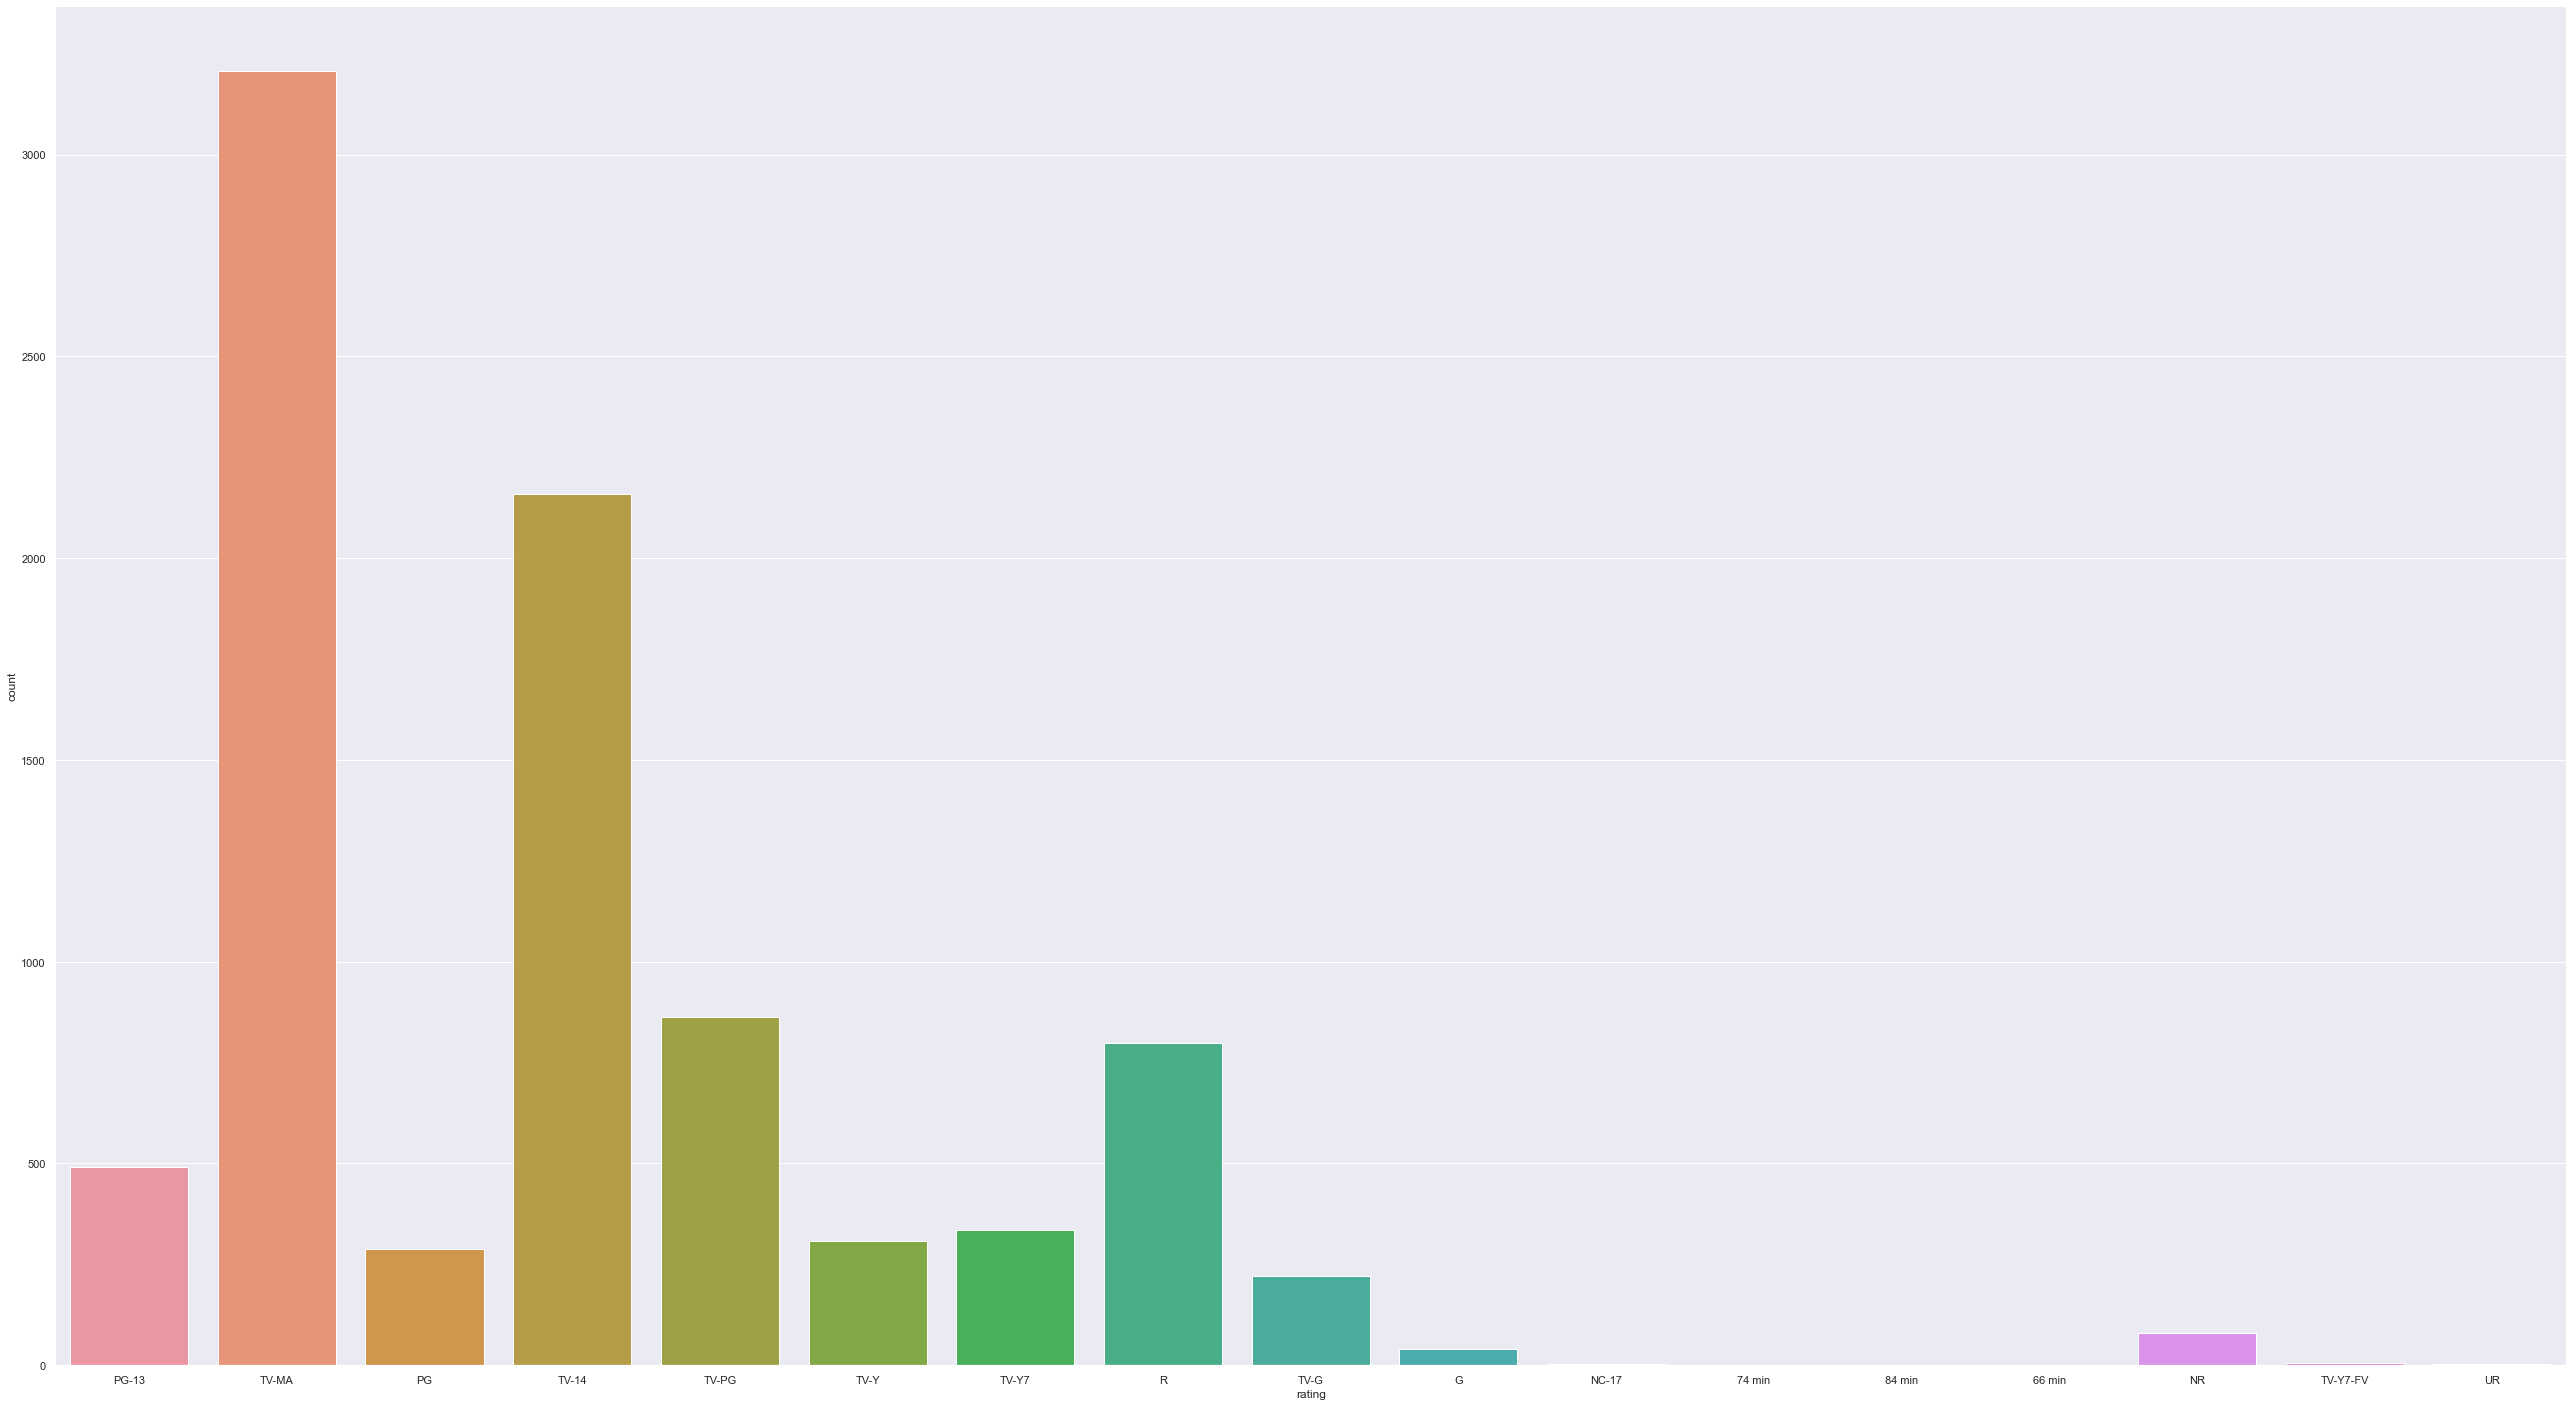

In [70]:
sns.set(rc={'figure.figsize':(45,25)})
sns.countplot(x=df['rating'])

<AxesSubplot:xlabel='type', ylabel='count'>

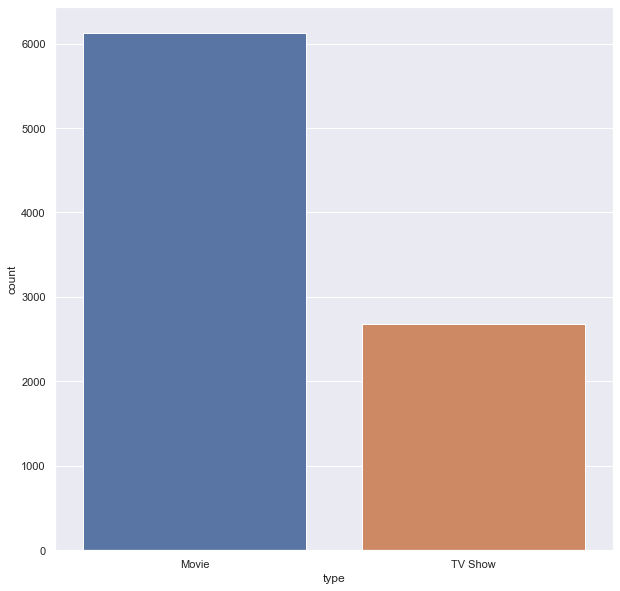

In [71]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x=df['type'])

### Bi-Variate Analysis

#### Movies Yearly Trend 

In [73]:
df1 = df_final[df_final['type']=='Movie'].groupby(['Year'])['title'].nunique().reset_index() 
df1.columns = ['Year','No_of_contents']
df1 = df1.sort_values(by = 'Year')
df1 #There is little drop in content in 2020 & 2021 (probably because of covid impact )

,Year,No_of_contents
0,2008.0,1
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,6
6,2014.0,19
7,2015.0,56
8,2016.0,253
9,2017.0,839


<AxesSubplot:xlabel='Year', ylabel='No_of_contents'>

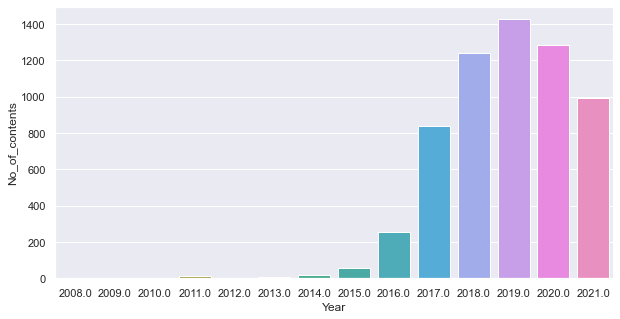

In [74]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Year',y='No_of_contents',data=df1)
#In recent years, there has been surge in content addition, however last two years there is a drop because of covid impact

#### Movie Yearly Release trend

In [75]:
df1 = df_final[df_final['type']=='Movie'].groupby(['release_year'])['title'].nunique().reset_index() 
#There is little drop in content in 2020 & 2021 (probably because of covid impact )
df1.columns = ['release_year','No_of_contents']
df1 = df1.sort_values(by = 'release_year')
df1[-30:]

,release_year,No_of_contents
43,1992,20
44,1993,24
45,1994,20
46,1995,23
47,1996,21
48,1997,34
49,1998,32
50,1999,32
51,2000,33
52,2001,40


<AxesSubplot:xlabel='release_year', ylabel='No_of_contents'>

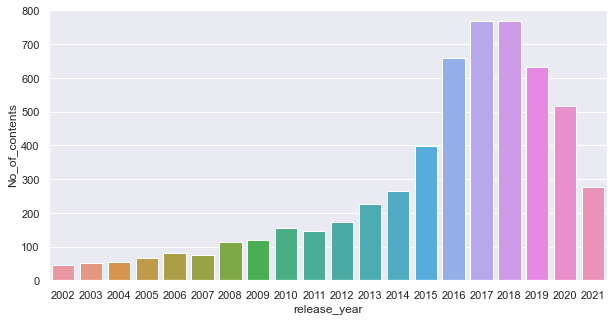

In [76]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='release_year',y='No_of_contents',data=df1[-20:])
#In recent years, there has been surge in content addition, however last two years there is a drop because of covid impact

#### Movies Monthly Trend

In [77]:
df1 = df_final[df_final['type']=='Movie'].groupby(['Month'])['title'].nunique().reset_index() 
df1.columns = ['Month','No_of_contents']
df1 = df1.sort_values(by = 'Month')
df1 #Again July & December seems to be the month having higher volumes of content

,Month,No_of_contents
0,1.0,546
1,2.0,382
2,3.0,529
3,4.0,550
4,5.0,439
5,6.0,492
6,7.0,565
7,8.0,519
8,9.0,519
9,10.0,545


<AxesSubplot:xlabel='Month', ylabel='No_of_contents'>

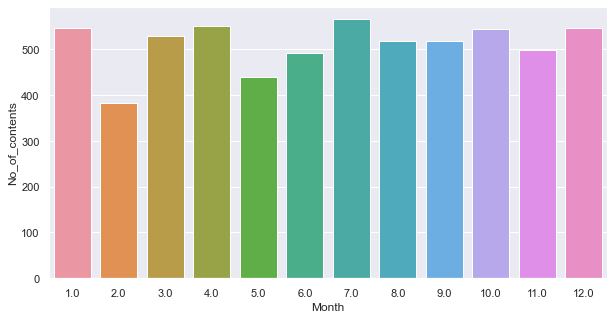

In [78]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Month',y='No_of_contents',data=df1)

#### TV Shows Yearly Trend

In [79]:
df1 = df_final[df_final['type']=='TV Show'].groupby(['Year'])['title'].nunique().reset_index() 
df1.columns = ['Year','No_of_contents']
df1 = df1.sort_values(by = 'Year')
df1 # There has been increasing trend in volume of tv shows added on netflix

,Year,No_of_contents
0,2008.0,1
1,2013.0,5
2,2014.0,5
3,2015.0,26
4,2016.0,176
5,2017.0,349
6,2018.0,412
7,2019.0,592
8,2020.0,595
9,2021.0,505


<AxesSubplot:xlabel='Year', ylabel='No_of_contents'>

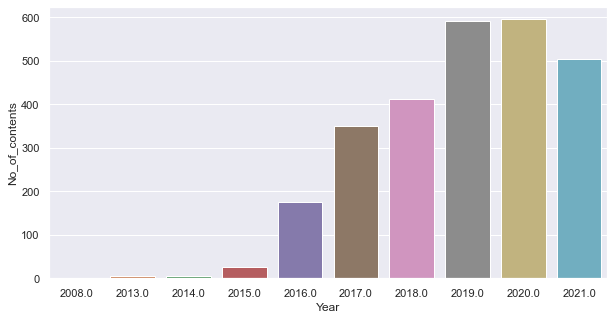

In [80]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Year',y='No_of_contents',data=df1)
# There has been increasing trend in volume of tv shows added on netflix

#### TV Shows Yearly Release Trend

<AxesSubplot:xlabel='release_year', ylabel='No_of_contents'>

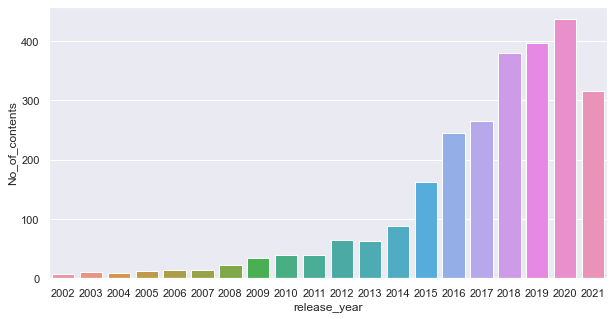

In [81]:
df1 = df_final[df_final['type']=='TV Show'].groupby(['release_year'])['title'].nunique().reset_index() 
df1.columns = ['release_year','No_of_contents']
df1 = df1.sort_values(by = 'release_year')
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='release_year',y='No_of_contents',data=df1[-20:])
# Unlike movies where we saw dip in 2020, there is continuous surge in tv shows. 2021 is not a complete month

#### Monthly TV Shows Trend

In [82]:
df1 = df_final[df_final['type']=='TV Show'].groupby(['Month'])['title'].nunique().reset_index() 
#There is little drop in content in 2020 & 2021 (probably because of covid impact )
df1.columns = ['Month','No_of_contents']
df1 = df1.sort_values(by = 'Month')
df1 # Again July & December seems to be the month having higher volumes of content

,Month,No_of_contents
0,1.0,192
1,2.0,181
2,3.0,213
3,4.0,214
4,5.0,193
5,6.0,236
6,7.0,262
7,8.0,236
8,9.0,251
9,10.0,215


<AxesSubplot:xlabel='Month', ylabel='No_of_contents'>

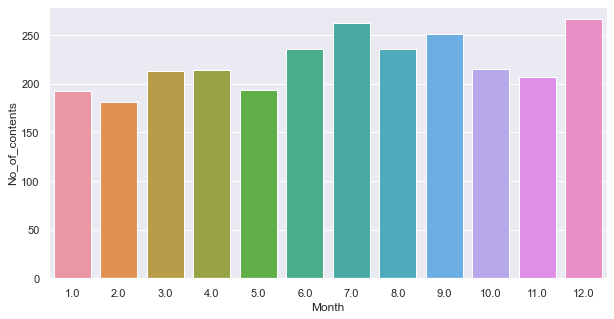

In [83]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Month',y='No_of_contents',data=df1)

#### Movies Vs TV Shows

In [84]:
df1 = df_final.pivot_table(values = ['title'], index = ['Year'], columns=['type'],\
                     aggfunc = lambda x: len(x.unique()), fill_value=0).reset_index()
df1 = df1.droplevel(0, axis=1)
df1.columns = ['Year','Movie', 'TV Show']
df1['Total'] = df1['Movie'] + df1['TV Show']
df1['%Movies'] = round((df1['Movie']/df1['Total'])*100,1)
df1['%TV Show'] = round((df1['TV Show']/df1['Total'])*100,1)
df1

,Year,Movie,TV Show,Total,%Movies,%TV Show
0,2008.0,1,1,2,50.0,50.0
1,2009.0,2,0,2,100.0,0.0
2,2010.0,1,0,1,100.0,0.0
3,2011.0,13,0,13,100.0,0.0
4,2012.0,3,0,3,100.0,0.0
5,2013.0,6,5,11,54.5,45.5
6,2014.0,19,5,24,79.2,20.8
7,2015.0,56,26,82,68.3,31.7
8,2016.0,253,176,429,59.0,41.0
9,2017.0,839,349,1188,70.6,29.4


<AxesSubplot:xlabel='Year'>

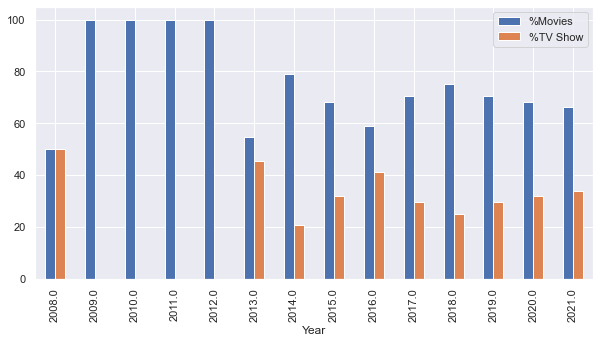

In [85]:
df1.plot(x='Year',y=['%Movies','%TV Show'], kind="bar")
# In last 5 years, we can see that the percentage of tv shows is increasing

In [86]:
df1 = df_final.pivot_table(values = ['title'], index = ['Month'], columns=['type'],\
                     aggfunc = lambda x: len(x.unique()), fill_value=0).reset_index()
df1 = df1.droplevel(0, axis=1)
df1.columns = ['Month','Movie', 'TV Show']
df1['Total'] = df1['Movie'] + df1['TV Show']
df1['%Movies'] = round((df1['Movie']/df1['Total'])*100,1)
df1['%TV Show'] = round((df1['TV Show']/df1['Total'])*100,1)
df1 #Highst monthly contribution to tv shows is in december

,Month,Movie,TV Show,Total,%Movies,%TV Show
0,1.0,546,192,738,74.0,26.0
1,2.0,382,181,563,67.9,32.1
2,3.0,529,213,742,71.3,28.7
3,4.0,550,214,764,72.0,28.0
4,5.0,439,193,632,69.5,30.5
5,6.0,492,236,728,67.6,32.4
6,7.0,565,262,827,68.3,31.7
7,8.0,519,236,755,68.7,31.3
8,9.0,519,251,770,67.4,32.6
9,10.0,545,215,760,71.7,28.3


<AxesSubplot:xlabel='Month'>

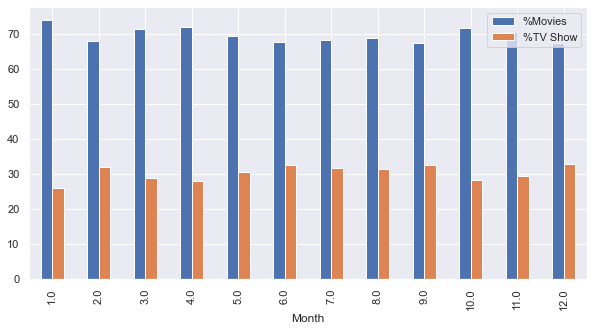

In [87]:
df1.plot(x='Month',y=['%Movies','%TV Show'], kind="bar")

In [88]:
df1 = df_final.pivot_table(values = ['title'], index = ['country'], columns=['type'],\
                     aggfunc = lambda x: len(x.unique()), fill_value=0).reset_index()
df1 = df1.droplevel(0, axis=1)
df1.columns = ['Country','Movie', 'TV Show']
df1['Total'] = df1['Movie'] + df1['TV Show']
df1['%Movies'] = round((df1['Movie']/df1['Total'])*100,1)
df1['%TV Show'] = round((df1['TV Show']/df1['Total'])*100,1)
df1 = df1.sort_values(by = ['Total'], ascending=False)
df1

,Country,Movie,TV Show,Total,%Movies,%TV Show
118,United States,3192,1330,4522,70.6,29.4
46,India,962,84,1046,92.0,8.0
116,United Kingdom,532,272,804,66.2,33.8
21,Canada,319,126,445,71.7,28.3
37,France,303,90,393,77.1,22.9
...,...,...,...,...,...,...
56,Kazakhstan,1,0,1,100.0,0.0
53,Jamaica,1,0,1,100.0,0.0
98,Slovakia,1,0,1,100.0,0.0
35,Ethiopia,1,0,1,100.0,0.0


<AxesSubplot:xlabel='Country'>

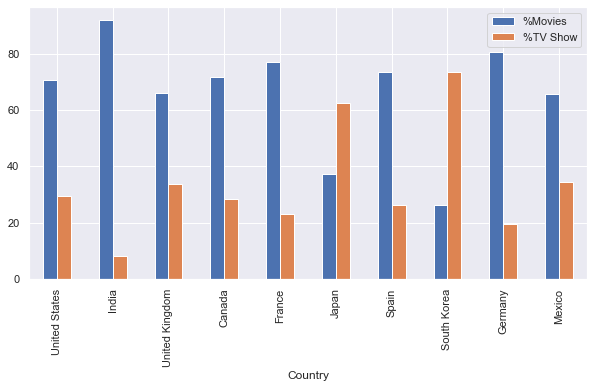

In [89]:
df1[0:10].plot(x='Country',y=['%Movies','%TV Show'], kind="bar")
# India is majorly focussed on movies, while Japan & Korea majorly on TV series

In [90]:
df_final.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'duration_new',
       'Year', 'Month', 'Week', 'cast_new', 'director_new'],
      dtype='object')

### Top Most Genres of each country

In [91]:
df1 = df_final.groupby(['country','listed_in'])['title'].nunique().reset_index()
df1.columns = ['country','listed_in','No_of_contents']
df1 = df1.sort_values(by = ['country' ,'No_of_contents'], ascending=False)
df1 = df1.drop_duplicates(subset=['country'], keep='first')
df1 = df1.sort_values(by = ['No_of_contents'], ascending=False)
df1

,country,listed_in,No_of_contents
1346,United States,Dramas,946
521,India,International Movies,864
1295,United Kingdom,British TV Shows,225
386,France,International Movies,207
1104,South Korea,International TV Shows,152
...,...,...,...
689,Kazakhstan,Children & Family Movies,1
640,Jamaica,Dramas,1
356,Ethiopia,Dramas,1
334,Ecuador,Documentaries,1


In [92]:
df2 = df_final.groupby(['country'])['title'].nunique().reset_index()
df2.columns = ['country','Tot_no_of_contents']
df2

,country,Tot_no_of_contents
0,Afghanistan,1
1,Albania,1
2,Algeria,3
3,Angola,1
4,Argentina,91
...,...,...
121,Vatican City,1
122,Venezuela,4
123,Vietnam,7
124,West Germany,5


In [93]:
df3 = df1.merge(df2, on = ['country'], how = 'left')
df3 = df3.sort_values(by = ['Tot_no_of_contents'], ascending=False)
df3['%Content'] = round((df3['No_of_contents']/df3['Tot_no_of_contents'])*100,1)
df3 # Indian Fans really like internaltional movies, while US prefer dramas

,country,listed_in,No_of_contents,Tot_no_of_contents,%Content
0,United States,Dramas,946,4522,20.9
1,India,International Movies,864,1046,82.6
2,United Kingdom,British TV Shows,225,804,28.0
9,Canada,Comedies,94,445,21.1
3,France,International Movies,207,393,52.7
...,...,...,...,...,...
97,East Germany,Children & Family Movies,1,1,100.0
98,Vatican City,Documentaries,1,1,100.0
99,"United States,",Documentaries,1,1,100.0
101,Sudan,Dramas,1,1,100.0


In [94]:
df1 = df_final.groupby(['country','cast'])['title'].nunique().reset_index()
df1.columns = ['country','cast','No_of_contents']
df1 = df1.sort_values(by = ['country' ,'No_of_contents'], ascending=False)
df1 = df1.drop_duplicates(subset=['country'], keep='first')
df1 = df1.sort_values(by = ['No_of_contents'], ascending=False)
df1
# Craig Sechler, Samuel West and Anupam Kher are the actors with highest content from US, UK & india respectively

,country,cast,No_of_contents
39285,United States,Craig Sechler,290
35001,United Kingdom,Samuel West,64
14212,India,Anupam Kher,56
20915,Japan,Takahiro Sakurai,31
28957,Spain,Mario Casas,25
...,...,...,...
21407,Latvia,Antti Reini,1
21290,Kazakhstan,David Attenborough,1
19425,Jamaica,Aiden Moodie,1
18222,Iran,Akash Gopal,1


In [95]:
df3 = df1.merge(df2, on = ['country'], how = 'left')
df3 = df3.sort_values(by = ['Tot_no_of_contents'], ascending=False)
df3['%Content'] = round((df3['No_of_contents']/df3['Tot_no_of_contents'])*100,1)
df3

,country,cast,No_of_contents,Tot_no_of_contents,%Content
0,United States,Craig Sechler,290,4522,6.4
2,India,Anupam Kher,56,1046,5.4
1,United Kingdom,Samuel West,64,804,8.0
5,Canada,Annie Murphy,25,445,5.6
6,France,Wille Lindberg,23,393,5.9
...,...,...,...,...,...
98,Slovakia,Anna Fialová,1,1,100.0
74,Albania,Claudio Santamaria,1,1,100.0
100,Sri Lanka,K.G. Chandani Renuka Ratnayake,1,1,100.0
73,Angola,Cigano Satyohamba,1,1,100.0


In [96]:
df1 = df_final.groupby(['country','director'])['title'].nunique().reset_index()
df1.columns = ['country','director','No_of_contents']
df1 = df1.sort_values(by = ['country' ,'No_of_contents'], ascending=False)
df1 = df1.drop_duplicates(subset=['country'], keep='first')
df1 = df1.sort_values(by = ['No_of_contents'], ascending=False)
df1

,country,director,No_of_contents
4387,United States,Abhishek Chaubey,509
3869,United Kingdom,Alastair Fothergill,223
3385,South Korea,Jung-ah Im,153
2619,Japan,Go Koga,149
1729,India,Anurag Kashyap,81
...,...,...,...
2930,Namibia,Christina Clusiau,1
2933,Nepal,Paakhi Tyrewala,1
3006,Nicaragua,Marc Levin,1
3114,Palestine,Lina Al Abed,1


In [97]:
df3 = df1.merge(df2, on = ['country'], how = 'left')
df3 = df3.sort_values(by = ['Tot_no_of_contents'], ascending=False)
df3['%Content'] = round((df3['No_of_contents']/df3['Tot_no_of_contents'])*100,1)
df3

,country,director,No_of_contents,Tot_no_of_contents,%Content
0,United States,Abhishek Chaubey,509,4522,11.3
4,India,Anurag Kashyap,81,1046,7.7
1,United Kingdom,Alastair Fothergill,223,804,27.7
7,Canada,Guy Vasilovich,59,445,13.3
8,France,Adrien Lagier,52,393,13.2
...,...,...,...,...,...
87,Puerto Rico,Abhishek Chaubey,1,1,100.0
89,Samoa,Sarah Moshman,1,1,100.0
92,Slovakia,Filip Renc,1,1,100.0
94,Sri Lanka,Arne Birkenstock,1,1,100.0
